## № 2

Consider 2D motion with random acceleration. Let $z_{1t}$ and $z_{2t}$ be the
horizontal and vertical locations of the object, and $\dot{z}_{1t}$ and $\dot{z}_{2t}$ be the corresponding velocity.
We can represent this as a state vector $z_t \in R^4$ as follows:
$$
z_t = (z_{1t},z_{2t},\dot{z}_{1t},\dot{z}_{2t})^T.
$$
Let us assume that the object would-be-moving  at constant velocity, but its motion is perturbed by random Gaussian noise (e.g., due to the wind). Additionally, we can only observe the noised location of the object $y_t \in R^2$, but not its velocity. We can model the system dynamics as follows:
$$
z_t = A_t z_{t-1} + \epsilon_t,\quad y_t = C_t z_t + \delta_t,
$$
with
$$
A_t = \left(
\begin{array}{cccc}
 1 & 0 & \Delta  & 0 \\
 0 & 1 & 0 & \Delta  \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1 \\
\end{array}
\right),\quad C_t = \left(
\begin{array}{cccc}
 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
\end{array}\right)
$$
and
$$
\epsilon_t\sim \mathcal{N}(0, \sigma\hat 1), \quad \delta_t \sim \mathcal{N}(0, \rho\hat 1).
$$
For the data in `10_2.pickle` [pickled dict of $y_t$, $\Delta$, $\sigma$  and $\rho$], compute the filtered trajectory $z_t$. Draw the filtered trajectory on the plane together with the observations and compute the prediction for the location of the object at $T+1$ (that is for the time instant, following the latest available observation).

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('10_2.pickle', 'rb') as file:
    data = pickle.load(file)
data.keys()

dict_keys(['sigma', 'rho', 'y', 'Delta'])

In [3]:
data

{'sigma': 10,
 'rho': 1000,
 'y': array([[ -17.64278779,    5.82127328],
        [ -36.13820365,  -35.64277334],
        [  30.11778409,   -9.93116516],
        [  34.28469344,   74.64568612],
        [  30.99932116,   23.04985132],
        [  24.37232458,   49.98893438],
        [  67.7513549 ,   55.26408107],
        [ -10.86084378,   44.11684436],
        [  71.52507334,   91.75735907],
        [ 105.25108066,  100.77658249],
        [  38.09938975,   99.28696663],
        [  41.21816004,   85.59966674],
        [  87.19696361,  103.96728572],
        [ 149.49224358,   67.87530934],
        [ 146.58305681,   74.37846528],
        [ 210.76206279,   64.01626756],
        [ 161.6668844 ,   29.99675857],
        [ 235.58918486,   32.78222579],
        [ 186.07057559,   76.68749792],
        [ 295.36708381,   74.11303117],
        [ 241.3103276 ,   88.77267501],
        [ 332.61402434,   43.93131569],
        [ 310.2090133 ,   29.50832031],
        [ 413.97410402,    4.88118267],
       

Воспользуемся библиотекой `filterpy` для реализации фильтра Калмана.

In [4]:
import filterpy.kalman as fpk

In [5]:
kf = fpk.KalmanFilter(dim_x = 4, dim_z = 2)

kf.Q *= data['sigma']   # transition covariance
kf.R *= data['rho']     # measurement noise
kf.P *= data['sigma']   #? initial covariance
kf.F = np.array([
    [1, 0, data['Delta'], 0],
    [0, 1, 0, data['Delta']],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])                      # state transition matrix
kf.H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
])                      # measurement function
kf.x = np.array([data['y'][0][0], data['y'][0][1], 0, 0]) # initial state


filtered, filter_cov, _, _ = kf.batch_filter(data['y'])

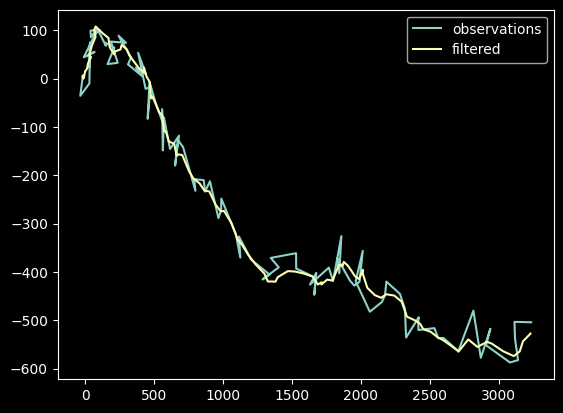

In [6]:
plt.plot(data['y'][:, 0], data['y'][:, 1], label = 'observations')
plt.plot(filtered[:, 0], filtered[:, 1], label = 'filtered')
plt.legend()

Предскажем положение сразу после последнего наблюдения:

In [7]:
kf.H @ kf.F @ kf.x

array([3281.6997802 , -522.42918941])